# Multi-Template-Matching
## Tutorial 1 - Introduction

This tutorial gives an overview of the different ways to use multiple template matching for object recognition.  
More documentation is available in the [wiki](https://github.com/LauLauThom/MultiTemplateMatching/wiki) section of the repository.

## Citations
If you use this implementation for your research, please cite:

Thomas, L.S.V., Gehrig, J.   
*Multi-template matching: a versatile tool for object-localization in microscopy images.*  
BMC Bioinformatics 21, 44 (2020). https://doi.org/10.1186/s12859-020-3363-7

-------------------------

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This tutorial is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
You are free to distribute and/or modify this tutorial, provided you attribute the author:  

Multi-Template Matching python package online - _Tutorial 1: Introduction_  
Laurent Thomas - 2019   
https://github.com/multi-template-matching/MultiTemplateMatching-Python/blob/master/tutorials/Tutorial1-Introduction.ipynb

## Let's code !

In [1]:
# Set the root of the repo as the working directory, when running the notebook locally to load the package locally too
# Not needed if the package was installed with pip
%cd ..

C:\Users\Laurent.Thomas\Documents\GitHub\MultiTemplateMatching-Python


In [ ]:
# Install matplotlib if not already installed
# it is used in this notebook, but is otherwise not an actual dependency of MTM
%pip install matplotlib

In [1]:
# 1st import the package and check its version
import MTM
print("MTM version: ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage.data import coins
import matplotlib.pyplot as plt

MTM version:  2.0.0


The main function in MTM is `matchTemplates`.  
Let's have a look at its docstring.

In [14]:
matchTemplates?

Signature:
matchTemplates(
    listTemplates: List[Tuple[str, numpy.ndarray[Any, numpy.dtype[+ScalarType]], Union[numpy.ndarray[Any, numpy.dtype[+ScalarType]], NoneType]]],
    image: numpy.ndarray[typing.Any, numpy.dtype[+ScalarType]],
    method: int = 5,
    N_object=inf,
    score_threshold: float = 0.5,
    maxOverlap: float = 0.25,
    searchBox: Union[Tuple[int, int, int, int], NoneType] = None,
) -> List[Tuple[str, Tuple[int, int, int, int], float]]
Docstring:
Search each template in the image, and return the best N_object locations which offer the best score and which do not overlap above the maxOverlap threshold.

Parameters
----------
- listTemplates : list of tuples as (LabelString, template, mask (optional))
                  templates to search in each image, associated to a label
                  labelstring : string
                  template    : numpy array (grayscale or RGB)
                  mask (optional): numpy array, should have the same dimensions and type tha

As you can read from the doc, the function have 2 main image arguments :
- a list of template images to search
- an image in which to search for objects using the templates

Let's open some image of coins from scikit-image, we will showcase the multi-template matching for the detection of the coin locations

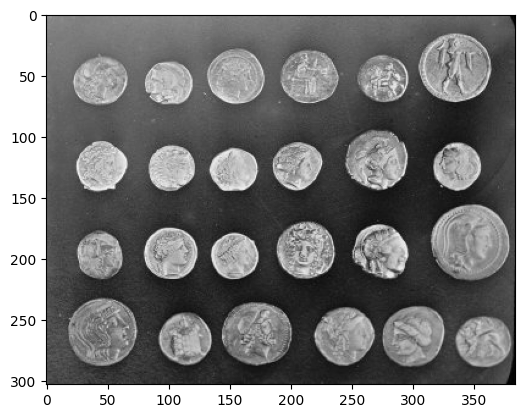

In [2]:
image = coins()
plt.imshow(image, cmap="gray")

## - crop a template  
We need some template image to search in the image.  
We can simply crop some coins from the image.  
__NB : templates are always rectangular (there are image matrices). And thus the predicted locations are always rectangular too !__

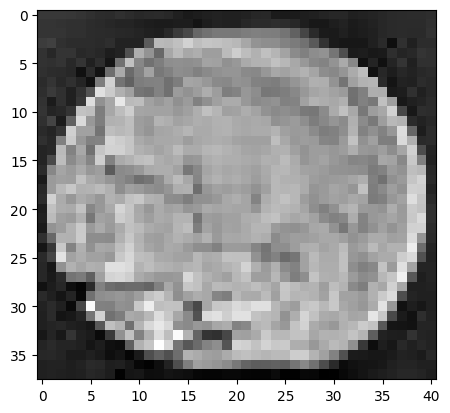

In [3]:
smallCoin = coins()[37:37+38, 80:80+41] 
plt.imshow(smallCoin, cmap="gray")

## - Calling matchTemplates with a single template
We will now use the `matchTemplates` that we have seen above.

In [8]:
# 1st format the template into a list of tuple (label, templateImage)
listTemplate = [('small', smallCoin)]

# Then call the function matchTemplates (here a single template)
listHits = matchTemplates(listTemplate, image, score_threshold=0.5, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)

Here the coins are nicely separated so we do not expect any overlap between the predicted coins locations ie `maxOverlap=0`.  
For the score, we use a normalised cross-correlation `cv2.TM_CCOEFF_NORMED`, which is robust to illumination changes.  
Such score ranges from 0 to 1 and a good score is close to 1. `score_threshold=0.5` is thus usually a safe value.

Let's have a look at `listHits`...

In [9]:
print("Found {} hits".format( len(listHits) ) )
listHits

Found 18 hits


[('small', (80, 37, 41, 38), 1.0),
 ('small', (133, 108, 41, 38), 0.8608093),
 ('small', (134, 178, 41, 38), 0.8161434),
 ('small', (82, 106, 41, 38), 0.80047214),
 ('small', (316, 105, 41, 38), 0.74788666),
 ('small', (23, 178, 41, 38), 0.74224424),
 ('small', (185, 103, 41, 38), 0.68531644),
 ('small', (257, 34, 41, 38), 0.6578578),
 ('small', (26, 103, 41, 38), 0.61795336),
 ('small', (22, 37, 41, 38), 0.60669357),
 ('small', (335, 247, 41, 38), 0.58576703),
 ('small', (227, 239, 41, 38), 0.5786777),
 ('small', (95, 244, 41, 38), 0.5769806),
 ('small', (286, 237, 41, 38), 0.54384065),
 ('small', (251, 106, 41, 38), 0.5254569),
 ('small', (157, 234, 41, 38), 0.5249821),
 ('small', (134, 37, 41, 38), 0.5114375),
 ('small', (196, 27, 41, 38), 0.50683254)]

As you can see, `listHits` is a list with each entry a tuple (name, (x,y,width,height), score)
- the name of the template that yield the match
- the coordinates of the bounding box (x, y, width, height)
- the score for that detection  

The first hit in the list has a score of 1 and is the coin that is used as template.

## - View the detections
We can then represent the detections as bounding boxes overlaid on the image, with a tag for the label.

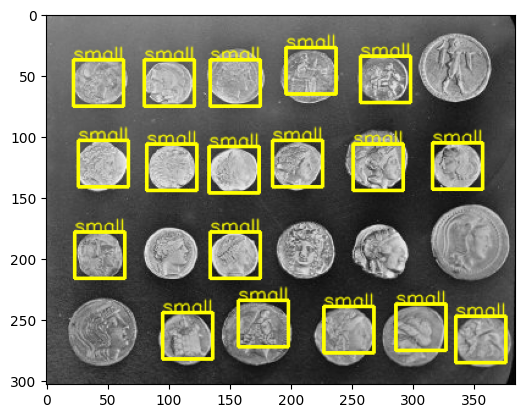

In [10]:
Overlay = drawBoxesOnRGB(image, listHits, showLabel=True)
plt.imshow(Overlay)

## - Decreasing the score-threshold
This is pretty good already but we dont catch some of the small coins.  
Let's reduce the score threshold to be more permissive e.g. `score_threshold = 0.4`

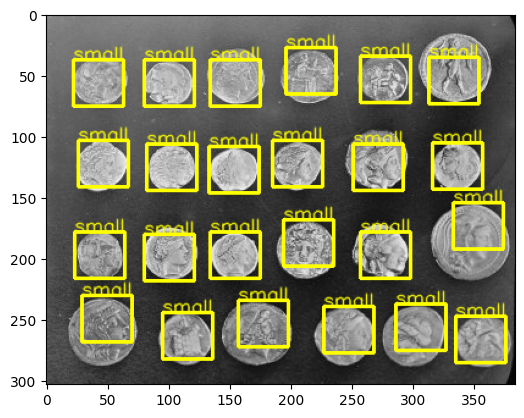

In [11]:
listHits = matchTemplates(listTemplate, image, score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, listHits, showLabel=True)
plt.imshow(Overlay)

## - Using multiple templates
Using a single template is quite good already for this particular example.    
What if now we would like to do better and somehow differentiate between small and large coins...  
The function matchTemplates allow to use several templates, and yields the best detections for each location in the image. 

Let's crop one of the big coin to use as a second template.

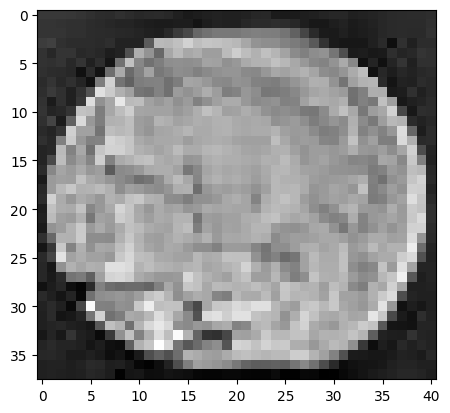

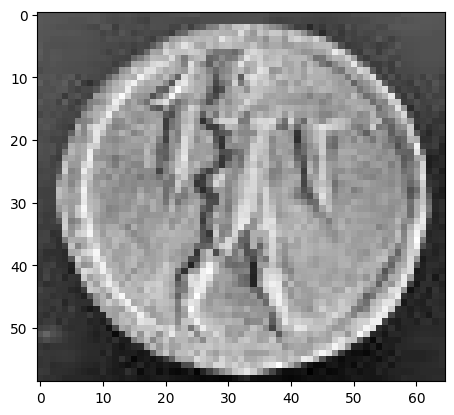

In [12]:
largeCoin = coins()[14:14+59,302:302+65]
plt.figure(0)
plt.imshow(smallCoin, cmap="gray")
plt.figure(1)
plt.imshow(largeCoin, cmap="gray")

Again we pack the templates in a list of tuples in the form `(label, template)`.    
Before calling the function `matchTemplates` and displaying the result.

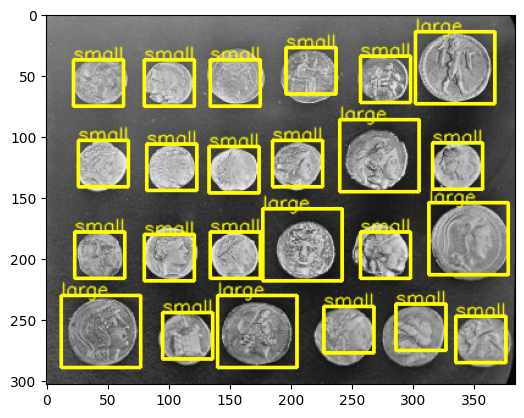

In [13]:
listTemplate = [("small", smallCoin), ("large", largeCoin)]
listHits = matchTemplates(listTemplate, image, score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, listHits, showLabel=True)
plt.imshow(Overlay)

Et voila !  
Using several templates can be used to increase the chance to catch your object if it appears with different perspectives, or to perform classification of the detections using different templates as "classes".  
However, the more templates the longer the computation time.